In [164]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [165]:
df = pd.read_csv('data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [166]:
df

,Unnamed: 0,Parking,Swimming Pool,Restaurant,Room Service,Fitness Centre,Spa & Wellness Centre,Business Centre,Facilities for Disabled,Airport Shuttle,...,Highspeed Internet,Airconditioning,Safe/Vault,Tennis Court,Indoor Pool,Pet-friendly,Casino,Golfcourse,Beach Access,Ski-In Ski-Out
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,754,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755,755,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
756,756,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
757,757,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [167]:
df.shape

(759, 33)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  759 non-null    int64  
 1   Parking                     606 non-null    float64
 2   Swimming Pool               272 non-null    float64
 3   Restaurant                  317 non-null    float64
 4   Room Service                403 non-null    float64
 5   Fitness Centre              301 non-null    float64
 6   Spa & Wellness Centre       211 non-null    float64
 7   Business Centre             278 non-null    float64
 8   Facilities for Disabled     416 non-null    float64
 9   Airport Shuttle             203 non-null    float64
 10  Non-smoking Rooms           543 non-null    float64
 11  Babysitting/Child Services  49 non-null     float64
 12  Meeting/Banquet Facilities  254 non-null    float64
 13  Car Rental                  148 non

In [169]:
df.describe()

,Unnamed: 0,Parking,Swimming Pool,Restaurant,Room Service,Fitness Centre,Spa & Wellness Centre,Business Centre,Facilities for Disabled,Airport Shuttle,...,Highspeed Internet,Airconditioning,Safe/Vault,Tennis Court,Indoor Pool,Pet-friendly,Casino,Golfcourse,Beach Access,Ski-In Ski-Out
count,759.000000,606.0,272.0,317.0,403.0,301.0,211.0,278.0,416.0,203.0,...,595.000000,590.000000,460.000000,28.000000,159.000000,48.000000,99.000000,114.000000,203.000000,368.000000
mean,379.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.998319,0.998305,0.995652,0.785714,0.962264,0.562500,0.050505,0.131579,0.024631,0.005435
std,219.248717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.040996,0.041169,0.065866,0.417855,0.191159,0.501328,0.220099,0.339525,0.155380,0.073620
min,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189.500000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,568.500000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,758.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [170]:
# Sources Transfermarkt: https://www.transfermarkt.com/

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [171]:
# The dataset from 2021-2022 and 2022-2023 and this is the last version of it 

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [172]:
# The dataset is completely consistene every columns have the same valuse type 

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [173]:
df.drop(columns='Unnamed: 0' , inplace = True)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [174]:
df[df.duplicated()]

,Parking,Swimming Pool,Restaurant,Room Service,Fitness Centre,Spa & Wellness Centre,Business Centre,Facilities for Disabled,Airport Shuttle,Non-smoking Rooms,...,Highspeed Internet,Airconditioning,Safe/Vault,Tennis Court,Indoor Pool,Pet-friendly,Casino,Golfcourse,Beach Access,Ski-In Ski-Out
57,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
64,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
66,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
72,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,...,1.0,1.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
751,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,...,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
752,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
754,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
df.drop_duplicates(inplace = True)

In [176]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [177]:
df.isnull().sum()

Parking                        97
Swimming Pool                 311
Restaurant                    283
Room Service                  222
Fitness Centre                292
Spa & Wellness Centre         352
Business Centre               311
Facilities for Disabled       215
Airport Shuttle               365
Non-smoking Rooms             139
Babysitting/Child Services    460
Meeting/Banquet Facilities    322
Car Rental                    400
Breakfast Buffet              458
Bar/Lounge                    396
Kids Activities               482
Game Room                     459
Dry Cleaning                  262
Valet Parking                 392
name                            0
rate                          140
review                        140
Highspeed Internet             99
Airconditioning               111
Safe/Vault                    189
Tennis Court                  474
Indoor Pool                   390
Pet-friendly                  462
Casino                        410
Golfcourse    

In [178]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [179]:
df.dtypes

Parking                       float64
Swimming Pool                 float64
Restaurant                    float64
Room Service                  float64
Fitness Centre                float64
Spa & Wellness Centre         float64
Business Centre               float64
Facilities for Disabled       float64
Airport Shuttle               float64
Non-smoking Rooms             float64
Babysitting/Child Services    float64
Meeting/Banquet Facilities    float64
Car Rental                    float64
Breakfast Buffet              float64
Bar/Lounge                    float64
Kids Activities               float64
Game Room                     float64
Dry Cleaning                  float64
Valet Parking                 float64
name                           object
rate                          float64
review                         object
Highspeed Internet            float64
Airconditioning               float64
Safe/Vault                    float64
Tennis Court                  float64
Indoor Pool 

In [180]:
# go to clean them 

In [181]:
# check outliers 

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

In [182]:
numeric_col = [col for col in df.columns if df[col].dtype != 'object']
cate_col = [col for col in df.columns if df[col].dtype == 'object']        

In [183]:
for col in cate_col:
    if df[col].isnull().sum() > 0:
        df[col].fillna('0', inplace=True)

for col in numeric_col:
    if df[col].isnull().sum() > 0:
        df[col].fillna(0, inplace=True)

C:\Users\gharb\AppData\Local\Temp\ipykernel_41188\1871137559.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('0', inplace=True)
C:\Users\gharb\AppData\Local\Temp\ipykernel_41188\1871137559.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doin

In [184]:
df['review']

0      5662 reviews
1       830 reviews
2      1389 reviews
3                 0
4      2895 reviews
           ...     
749    4149 reviews
753     408 reviews
755               0
757    1647 reviews
758     202 reviews
Name: review, Length: 497, dtype: object

In [185]:
df['review'] = df['review'].map(lambda x: x.split(" ")[0])

In [186]:
df = df.astype({"review": int})

In [187]:
# float_col = [col for col in df.columns if df[col].dtype == 'float']

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 0 to 758
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Parking                     497 non-null    float64
 1   Swimming Pool               497 non-null    float64
 2   Restaurant                  497 non-null    float64
 3   Room Service                497 non-null    float64
 4   Fitness Centre              497 non-null    float64
 5   Spa & Wellness Centre       497 non-null    float64
 6   Business Centre             497 non-null    float64
 7   Facilities for Disabled     497 non-null    float64
 8   Airport Shuttle             497 non-null    float64
 9   Non-smoking Rooms           497 non-null    float64
 10  Babysitting/Child Services  497 non-null    float64
 11  Meeting/Banquet Facilities  497 non-null    float64
 12  Car Rental                  497 non-null    float64
 13  Breakfast Buffet            497 non-null

In [189]:
# df[float_col] = df[float_col].astype(int)

In [190]:
# go back to 6th dimention --> Completeness

In [191]:
# df.to_csv('test.csv')

### Correcting errors

-------------------

In [192]:
# go back to 7th dimension Accuracy 

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

In [193]:
df.columns

Index(['Parking', 'Swimming Pool', 'Restaurant', 'Room Service',
       'Fitness Centre', 'Spa & Wellness Centre', 'Business Centre',
       'Facilities for Disabled', 'Airport Shuttle', 'Non-smoking Rooms',
       'Babysitting/Child Services', 'Meeting/Banquet Facilities',
       'Car Rental', 'Breakfast Buffet', 'Bar/Lounge', 'Kids Activities',
       'Game Room', 'Dry Cleaning', 'Valet Parking', 'name', 'rate', 'review',
       'Highspeed Internet', 'Airconditioning', 'Safe/Vault', 'Tennis Court',
       'Indoor Pool', 'Pet-friendly', 'Casino', 'Golfcourse', 'Beach Access',
       'Ski-In Ski-Out'],
      dtype='object')

**Categorical & numerical --> (scatter plot, histogram, box plot)**

C:\Users\gharb\AppData\Local\Temp\ipykernel_41188\2700591096.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_name_rate, y='rate', x='name', palette='coolwarm', alpha=0.85, linewidth=2, edgecolor='black')
C:\Users\gharb\AppData\Local\Temp\ipykernel_41188\2700591096.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12, fontfamily='monospace')


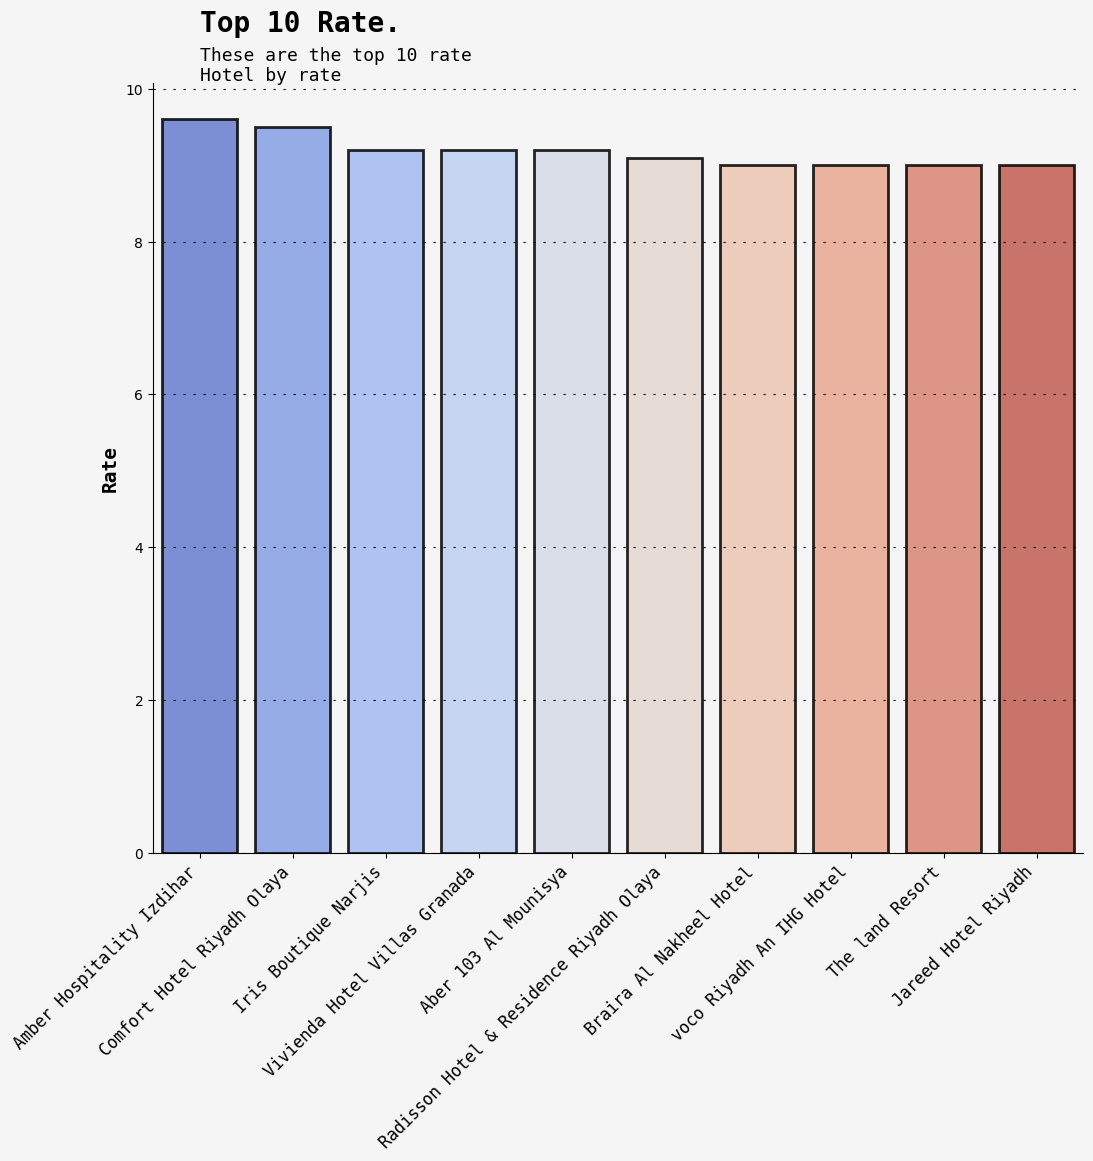

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by 'rate' and get the top 10
df_name_rate = df[['rate', 'name']].sort_values(by='rate', ascending=False).head(15)

# Create a bar plot for the top 10 names by rate
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=df_name_rate, y='rate', x='name', palette='coolwarm', alpha=0.85, linewidth=2, edgecolor='black')

# Customize the plot
sns.despine()
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')
ax.set_ylabel('Rate', fontsize=14, fontweight='bold', fontfamily='monospace')
ax.set_xlabel('')
ax.grid(False)
ax.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))

# Rotate x-axis labels for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12, fontfamily='monospace')

# Add text annotations in the top-left corner
ax.text(x=0, y=max(df_name_rate['rate']) + (max(df_name_rate['rate']) * 0.15), 
        s='Top 10 Rate.', fontsize=20, fontweight='bold', fontfamily='monospace', 
        ha='left', va='top')
ax.text(x=0, y=max(df_name_rate['rate'])+ (max(df_name_rate['rate']) * 0.1), 
        s='These are the top 10 rate \nHotel by rate', fontsize=13, fontfamily='monospace', 
        ha='left', va='top')

# Display the plot
plt.show()


C:\Users\gharb\AppData\Local\Temp\ipykernel_41188\3839302833.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_name_rate, y='rate', x='name', palette='coolwarm', alpha=0.85, linewidth=2, edgecolor='black')
C:\Users\gharb\AppData\Local\Temp\ipykernel_41188\3839302833.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12, fontfamily='monospace')


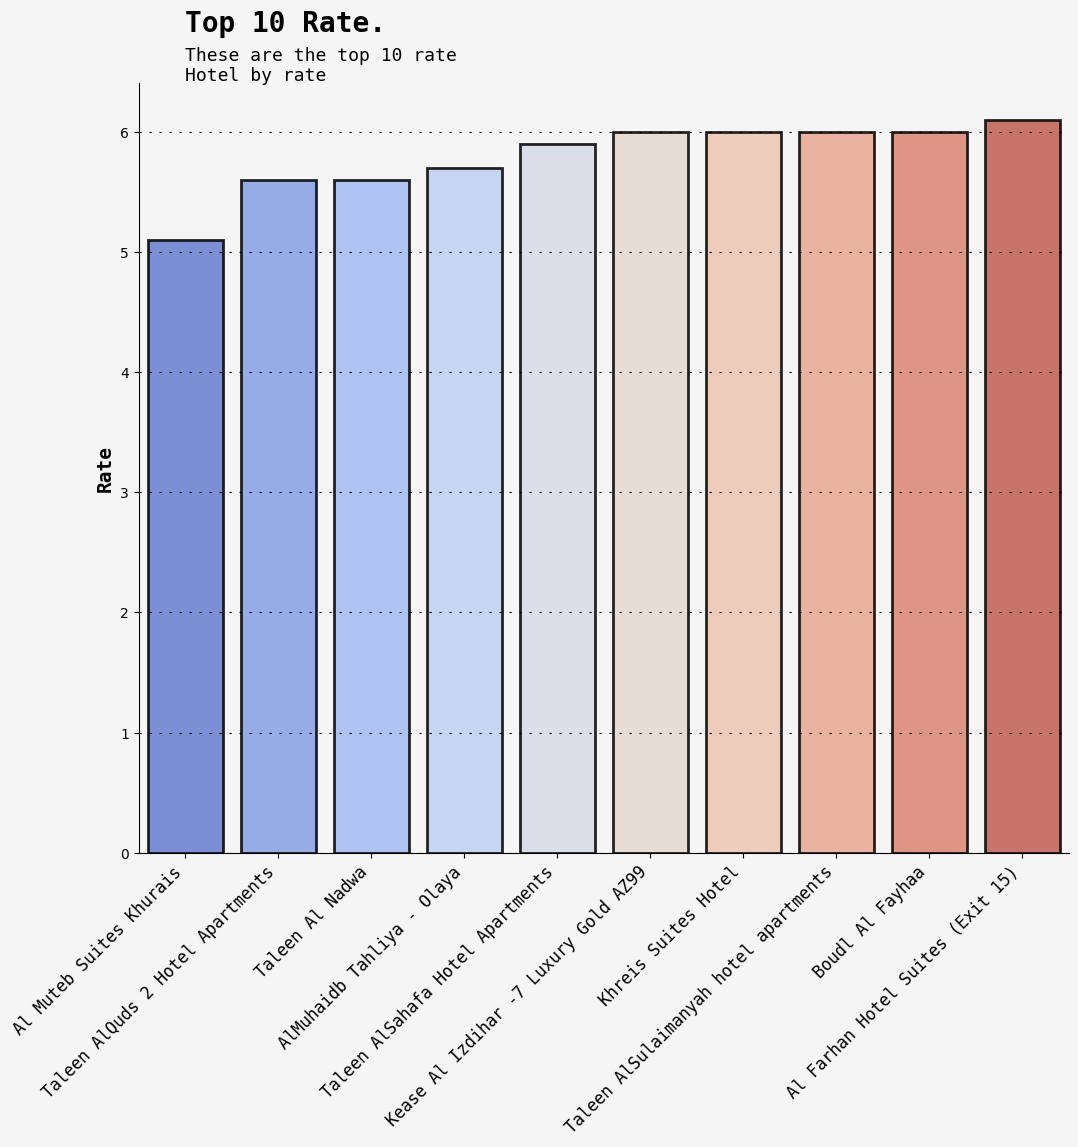

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by 'rate' and get the top 10
df_name_rate = df[['rate', 'name']][df['rate'] > 1].sort_values(by='rate', ascending=True).head(25)

# Create a bar plot for the top 10 names by rate
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=df_name_rate, y='rate', x='name', palette='coolwarm', alpha=0.85, linewidth=2, edgecolor='black')

# Customize the plot
sns.despine()
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')
ax.set_ylabel('Rate', fontsize=14, fontweight='bold', fontfamily='monospace')
ax.set_xlabel('')
ax.grid(False)
ax.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))

# Rotate x-axis labels for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12, fontfamily='monospace')

# Add text annotations in the top-left corner
ax.text(x=0, y=max(df_name_rate['rate']) + (max(df_name_rate['rate']) * 0.15), 
        s='Top 10 Rate.', fontsize=20, fontweight='bold', fontfamily='monospace', 
        ha='left', va='top')
ax.text(x=0, y=max(df_name_rate['rate'])+ (max(df_name_rate['rate']) * 0.1), 
        s='These are the top 10 rate \nHotel by rate', fontsize=13, fontfamily='monospace', 
        ha='left', va='top')

# Display the plot
plt.show()


C:\Users\gharb\AppData\Local\Temp\ipykernel_41188\1618463789.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pool_counts.index, y=pool_counts.values, palette='viridis', alpha=0.85, linewidth=2, edgecolor='black')
C:\Users\gharb\AppData\Local\Temp\ipykernel_41188\1618463789.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=12, fontfamily='monospace')


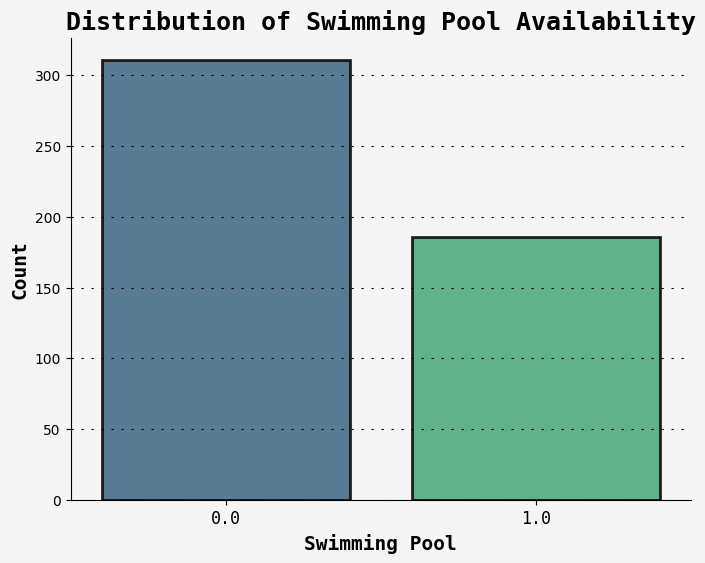

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the value counts for the 'Swimming Pool' column
pool_counts = df['Swimming Pool'].value_counts()

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=pool_counts.index, y=pool_counts.values, palette='viridis', alpha=0.85, linewidth=2, edgecolor='black')

# Customize the plot
sns.despine()
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')
ax.set_ylabel('Count', fontsize=14, fontweight='bold', fontfamily='monospace')
ax.set_xlabel('Swimming Pool', fontsize=14, fontweight='bold', fontfamily='monospace')
ax.set_title('Distribution of Swimming Pool Availability', fontsize=18, fontweight='bold', fontfamily='monospace')
ax.grid(False)
ax.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))

# Rotate x-axis labels for clarity if needed
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=12, fontfamily='monospace')

# Display the plot
plt.show()


In [220]:
df_new = df[numeric_col]
df_new.drop(columns='Ski-In Ski-Out' , inplace=True)
df_new.drop(columns='Beach Access' , inplace=True)
df_new.drop(columns='Casino' , inplace=True)
df_new.drop(columns='rate' , inplace=True)
df_new.rename(columns={'Bar/Lounge' : 'Lounge'} , inplace=True)

C:\Users\gharb\AppData\Local\Temp\ipykernel_41188\2161395494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(columns='Ski-In Ski-Out' , inplace=True)
C:\Users\gharb\AppData\Local\Temp\ipykernel_41188\2161395494.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(columns='Beach Access' , inplace=True)
C:\Users\gharb\AppData\Local\Temp\ipykernel_41188\2161395494.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

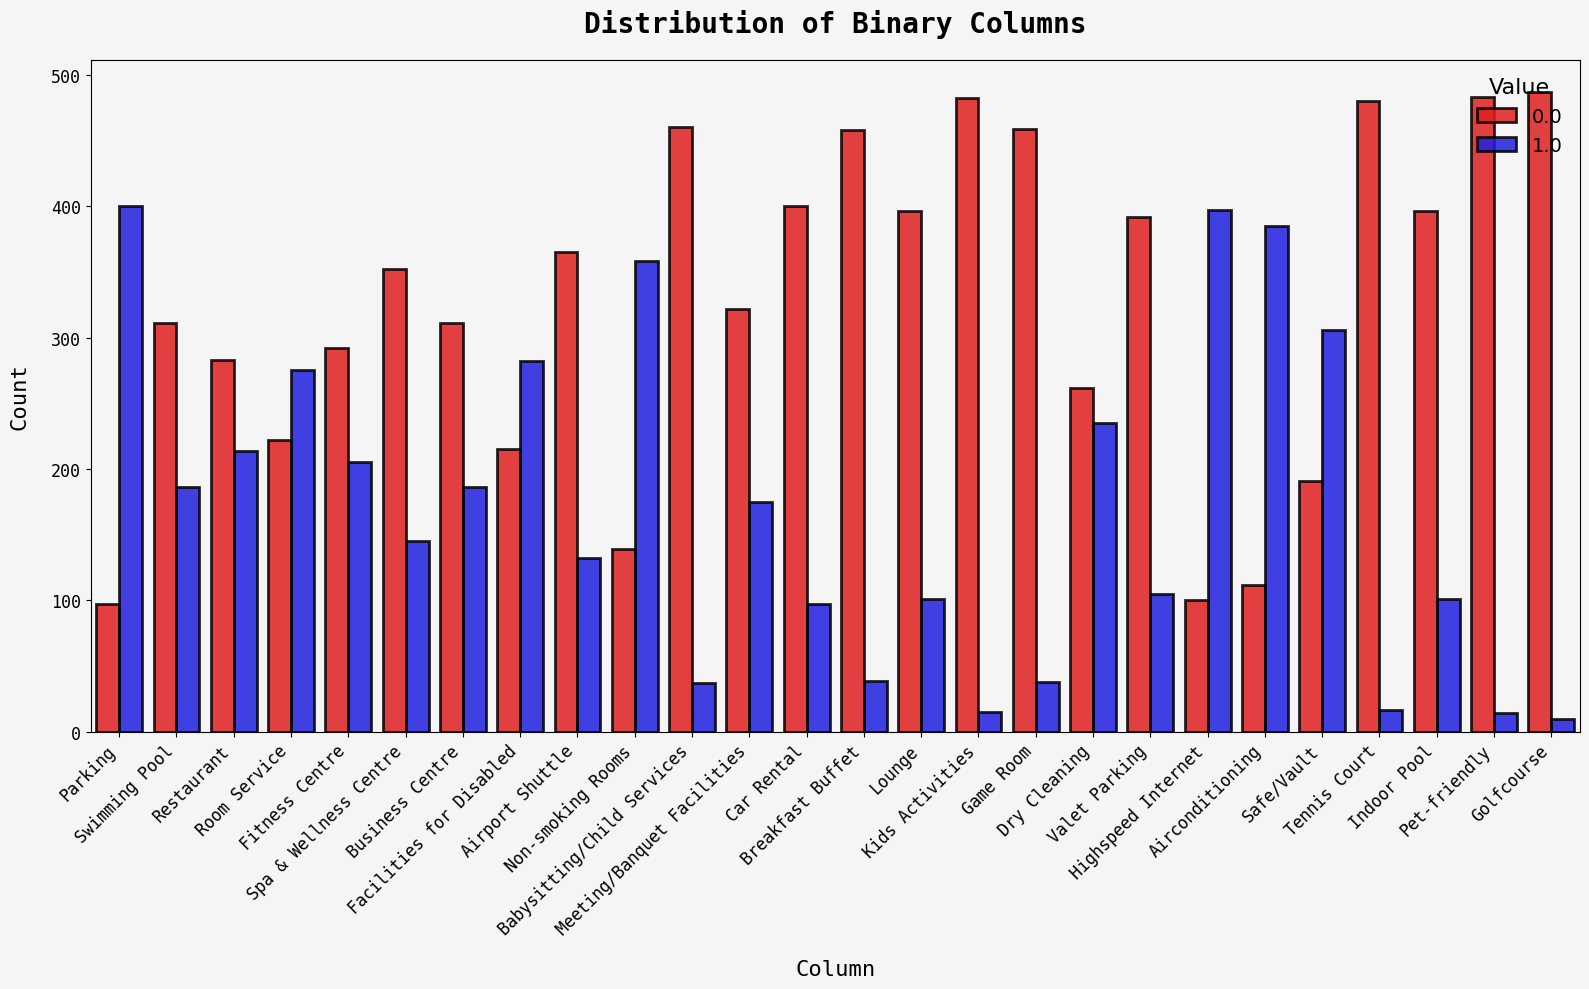

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame to have a long-form DataFrame suitable for a single countplot
df_melted = df_new.melt(var_name='Column', value_name='Value')

# Create a countplot with custom colors for each value
plt.figure(figsize=(16, 10))
sns.countplot(data=df_melted, x='Column', hue='Value', palette={0: 'red', 1: 'blue'}, alpha=0.85, linewidth=2, edgecolor='black')

# Customize the plot
plt.title('Distribution of Binary Columns', fontsize=20, fontweight='bold', fontfamily='monospace', pad=20)
plt.xlabel('Column', fontsize=16, fontfamily='monospace', labelpad=15)
plt.ylabel('Count', fontsize=16, fontfamily='monospace', labelpad=15)
plt.xticks(rotation=45, ha='right', fontsize=12, fontfamily='monospace')
plt.yticks(fontsize=12, fontfamily='monospace')
plt.legend(title='Value', fontsize=14, title_fontsize=16, loc='upper right', frameon=False)
plt.grid(False)
plt.gca().set_facecolor('#F5F5F5')
plt.gcf().set_facecolor('#F5F5F5')

# Adjust layout to prevent clipping of tick labels
plt.tight_layout()

plt.show()


In [222]:
df_name_rate = df[df['rate'] > 1].sort_values(by='rate', ascending=False).head(25)
df_new = df[numeric_col]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame to have a long-form DataFrame suitable for a single countplot
df_melted = df_new.melt(var_name='Column', value_name='Value')

# Create a countplot with custom colors for each value
plt.figure(figsize=(16, 10))
sns.countplot(data=df_melted, x='Column', hue='Value', palette={0: 'red', 1: 'blue'}, alpha=0.85, linewidth=2, edgecolor='black')

# Customize the plot
plt.title('Distribution of Binary Columns', fontsize=20, fontweight='bold', fontfamily='monospace', pad=20)
plt.xlabel('Column', fontsize=16, fontfamily='monospace', labelpad=15)
plt.ylabel('Count', fontsize=16, fontfamily='monospace', labelpad=15)
plt.xticks(rotation=45, ha='right', fontsize=12, fontfamily='monospace')
plt.yticks(fontsize=12, fontfamily='monospace')
plt.legend(title='Value', fontsize=14, title_fontsize=16, loc='upper right', frameon=False)
plt.grid(False)
plt.gca().set_facecolor('#F5F5F5')
plt.gcf().set_facecolor('#F5F5F5')

# Adjust layout to prevent clipping of tick labels
plt.tight_layout()

plt.show()
